In [4]:
import pandas as pd
import pylab as pl
import numpy as np
import seaborn as sns

import yaml
from nnaps import predictors
from sklearn import metrics

pd.set_option('display.max_columns', None)

Using TensorFlow backend.


In [15]:
df_raw = pd.read_csv('../../data/processed/sdBShortP_large_BPS_training_set.csv')

In [16]:
features = 'MS_P MS_q MS_M1 MS_duration RGB_P RGB_q RGB_M1 RGB_duration'.split()
values = {f:0 for f in features}
df = df_raw.fillna(value=values)

In [18]:
setup = """
features: 
    - M1_init
    - q_init
    - P_init
    - FeH_init
    - stability_limit
    - alpha_ce
regressors:
    MS_P:
        processor: StandardScaler
    MS_q:
        processor: StandardScaler
    MS_M1:
        processor: StandardScaler
    MS_duration:
        processor: StandardScaler  
    RGB_P:
        processor: StandardScaler
    RGB_q:
        processor: StandardScaler
    RGB_M1:
        processor: StandardScaler
    RGB_duration:
        processor: StandardScaler
classifiers:
    - RGB
model:
   - {'layer':'Dense',   'args':[200], 'kwargs': {'activation':'relu', 'name':'FC_1'} }
   - {'layer':'Dense',   'args':[100], 'kwargs': {'activation':'relu', 'name':'FC_2'} }
   - {'layer':'Dense',   'args':[50],  'kwargs': {'activation':'relu', 'name':'FC_3'} }
optimizer: adam
"""
setup = yaml.safe_load(setup)
predictor_pre_interaction = predictors.FCPredictor(setup=setup, data=df)

In [19]:
predictor_pre_interaction.fit(epochs=100, batch_size=1024, reduce_lr=True)

Train on 10540 samples, validate on 2635 samples
Epoch 1/100
 - 3s - loss: 6.6535 - MS_P_loss: 0.6765 - MS_q_loss: 0.8771 - MS_M1_loss: 0.6214 - MS_duration_loss: 0.5795 - RGB_P_loss: 0.9264 - RGB_q_loss: 0.7884 - RGB_M1_loss: 0.7393 - RGB_duration_loss: 0.7428 - RGB_loss: 0.5624 - MS_P_mae: 0.6356 - MS_q_mae: 0.6609 - MS_M1_mae: 0.6746 - MS_duration_mae: 0.6367 - RGB_P_mae: 0.7677 - RGB_q_mae: 0.5846 - RGB_M1_mae: 0.7262 - RGB_duration_mae: 0.7216 - RGB_accuracy: 0.8818 - val_loss: 4.1872 - val_MS_P_loss: 0.4307 - val_MS_q_loss: 0.6638 - val_MS_M1_loss: 0.3273 - val_MS_duration_loss: 0.3328 - val_RGB_P_loss: 0.7241 - val_RGB_q_loss: 0.5233 - val_RGB_M1_loss: 0.3968 - val_RGB_duration_loss: 0.4194 - val_RGB_loss: 0.4152 - val_MS_P_mae: 0.5388 - val_MS_q_mae: 0.5695 - val_MS_M1_mae: 0.4640 - val_MS_duration_mae: 0.4772 - val_RGB_P_mae: 0.6752 - val_RGB_q_mae: 0.4832 - val_RGB_M1_mae: 0.5226 - val_RGB_duration_mae: 0.5110 - val_RGB_accuracy: 0.9989
Epoch 2/100
 - 0s - loss: 2.7830 - MS_P

Epoch 10/100
 - 0s - loss: 0.1807 - MS_P_loss: 0.0038 - MS_q_loss: 0.0051 - MS_M1_loss: 0.0032 - MS_duration_loss: 0.0520 - RGB_P_loss: 0.0053 - RGB_q_loss: 0.0205 - RGB_M1_loss: 0.0522 - RGB_duration_loss: 0.0229 - RGB_loss: 0.0179 - MS_P_mae: 0.0434 - MS_q_mae: 0.0466 - MS_M1_mae: 0.0419 - MS_duration_mae: 0.1383 - RGB_P_mae: 0.0527 - RGB_q_mae: 0.0506 - RGB_M1_mae: 0.0605 - RGB_duration_mae: 0.1110 - RGB_accuracy: 0.9985 - val_loss: 0.1592 - val_MS_P_loss: 0.0028 - val_MS_q_loss: 0.0037 - val_MS_M1_loss: 0.0029 - val_MS_duration_loss: 0.0573 - val_RGB_P_loss: 0.0038 - val_RGB_q_loss: 0.0162 - val_RGB_M1_loss: 0.0317 - val_RGB_duration_loss: 0.0241 - val_RGB_loss: 0.0124 - val_MS_P_mae: 0.0411 - val_MS_q_mae: 0.0462 - val_MS_M1_mae: 0.0423 - val_MS_duration_mae: 0.1355 - val_RGB_P_mae: 0.0487 - val_RGB_q_mae: 0.0508 - val_RGB_M1_mae: 0.0574 - val_RGB_duration_mae: 0.1111 - val_RGB_accuracy: 0.9989
Epoch 11/100
 - 1s - loss: 0.1722 - MS_P_loss: 0.0033 - MS_q_loss: 0.0047 - MS_M1_loss:

Epoch 19/100
 - 0s - loss: 0.1356 - MS_P_loss: 0.0021 - MS_q_loss: 0.0033 - MS_M1_loss: 0.0019 - MS_duration_loss: 0.0295 - RGB_P_loss: 0.0026 - RGB_q_loss: 0.0183 - RGB_M1_loss: 0.0446 - RGB_duration_loss: 0.0137 - RGB_loss: 0.0145 - MS_P_mae: 0.0291 - MS_q_mae: 0.0333 - MS_M1_mae: 0.0314 - MS_duration_mae: 0.0946 - RGB_P_mae: 0.0345 - RGB_q_mae: 0.0375 - RGB_M1_mae: 0.0478 - RGB_duration_mae: 0.0837 - RGB_accuracy: 0.9985 - val_loss: 0.1149 - val_MS_P_loss: 0.0014 - val_MS_q_loss: 0.0018 - val_MS_M1_loss: 0.0017 - val_MS_duration_loss: 0.0328 - val_RGB_P_loss: 0.0018 - val_RGB_q_loss: 0.0148 - val_RGB_M1_loss: 0.0304 - val_RGB_duration_loss: 0.0143 - val_RGB_loss: 0.0100 - val_MS_P_mae: 0.0280 - val_MS_q_mae: 0.0324 - val_MS_M1_mae: 0.0314 - val_MS_duration_mae: 0.0969 - val_RGB_P_mae: 0.0336 - val_RGB_q_mae: 0.0357 - val_RGB_M1_mae: 0.0460 - val_RGB_duration_mae: 0.0851 - val_RGB_accuracy: 0.9989
Epoch 20/100
 - 0s - loss: 0.1335 - MS_P_loss: 0.0020 - MS_q_loss: 0.0031 - MS_M1_loss:

Epoch 28/100
 - 0s - loss: 0.1196 - MS_P_loss: 0.0016 - MS_q_loss: 0.0028 - MS_M1_loss: 0.0016 - MS_duration_loss: 0.0200 - RGB_P_loss: 0.0022 - RGB_q_loss: 0.0175 - RGB_M1_loss: 0.0440 - RGB_duration_loss: 0.0114 - RGB_loss: 0.0131 - MS_P_mae: 0.0248 - MS_q_mae: 0.0289 - MS_M1_mae: 0.0278 - MS_duration_mae: 0.0763 - RGB_P_mae: 0.0305 - RGB_q_mae: 0.0334 - RGB_M1_mae: 0.0449 - RGB_duration_mae: 0.0751 - RGB_accuracy: 0.9985 - val_loss: 0.0980 - val_MS_P_loss: 0.0011 - val_MS_q_loss: 0.0013 - val_MS_M1_loss: 0.0012 - val_MS_duration_loss: 0.0227 - val_RGB_P_loss: 0.0014 - val_RGB_q_loss: 0.0145 - val_RGB_M1_loss: 0.0296 - val_RGB_duration_loss: 0.0114 - val_RGB_loss: 0.0088 - val_MS_P_mae: 0.0251 - val_MS_q_mae: 0.0272 - val_MS_M1_mae: 0.0263 - val_MS_duration_mae: 0.0772 - val_RGB_P_mae: 0.0290 - val_RGB_q_mae: 0.0343 - val_RGB_M1_mae: 0.0398 - val_RGB_duration_mae: 0.0755 - val_RGB_accuracy: 0.9989
Epoch 29/100
 - 0s - loss: 0.1170 - MS_P_loss: 0.0016 - MS_q_loss: 0.0027 - MS_M1_loss:

Epoch 37/100
 - 0s - loss: 0.1099 - MS_P_loss: 0.0016 - MS_q_loss: 0.0027 - MS_M1_loss: 0.0015 - MS_duration_loss: 0.0149 - RGB_P_loss: 0.0019 - RGB_q_loss: 0.0252 - RGB_M1_loss: 0.0524 - RGB_duration_loss: 0.0093 - RGB_loss: 0.0140 - MS_P_mae: 0.0249 - MS_q_mae: 0.0279 - MS_M1_mae: 0.0266 - MS_duration_mae: 0.0662 - RGB_P_mae: 0.0271 - RGB_q_mae: 0.0316 - RGB_M1_mae: 0.0442 - RGB_duration_mae: 0.0654 - RGB_accuracy: 0.9985 - val_loss: 0.0900 - val_MS_P_loss: 9.2142e-04 - val_MS_q_loss: 0.0014 - val_MS_M1_loss: 9.6764e-04 - val_MS_duration_loss: 0.0167 - val_RGB_P_loss: 0.0018 - val_RGB_q_loss: 0.0144 - val_RGB_M1_loss: 0.0306 - val_RGB_duration_loss: 0.0092 - val_RGB_loss: 0.0079 - val_MS_P_mae: 0.0230 - val_MS_q_mae: 0.0291 - val_MS_M1_mae: 0.0236 - val_MS_duration_mae: 0.0685 - val_RGB_P_mae: 0.0318 - val_RGB_q_mae: 0.0337 - val_RGB_M1_mae: 0.0509 - val_RGB_duration_mae: 0.0660 - val_RGB_accuracy: 0.9989
Epoch 38/100
 - 0s - loss: 0.1087 - MS_P_loss: 0.0015 - MS_q_loss: 0.0025 - MS_

Epoch 46/100
 - 0s - loss: 0.1030 - MS_P_loss: 0.0013 - MS_q_loss: 0.0023 - MS_M1_loss: 0.0011 - MS_duration_loss: 0.0126 - RGB_P_loss: 0.0017 - RGB_q_loss: 0.0177 - RGB_M1_loss: 0.0519 - RGB_duration_loss: 0.0078 - RGB_loss: 0.0125 - MS_P_mae: 0.0216 - MS_q_mae: 0.0229 - MS_M1_mae: 0.0219 - MS_duration_mae: 0.0582 - RGB_P_mae: 0.0252 - RGB_q_mae: 0.0306 - RGB_M1_mae: 0.0395 - RGB_duration_mae: 0.0591 - RGB_accuracy: 0.9985 - val_loss: 0.0830 - val_MS_P_loss: 7.8229e-04 - val_MS_q_loss: 8.5681e-04 - val_MS_M1_loss: 7.2861e-04 - val_MS_duration_loss: 0.0143 - val_RGB_P_loss: 0.0011 - val_RGB_q_loss: 0.0140 - val_RGB_M1_loss: 0.0298 - val_RGB_duration_loss: 0.0082 - val_RGB_loss: 0.0073 - val_MS_P_mae: 0.0211 - val_MS_q_mae: 0.0220 - val_MS_M1_mae: 0.0199 - val_MS_duration_mae: 0.0593 - val_RGB_P_mae: 0.0251 - val_RGB_q_mae: 0.0298 - val_RGB_M1_mae: 0.0436 - val_RGB_duration_mae: 0.0609 - val_RGB_accuracy: 0.9989
Epoch 47/100
 - 0s - loss: 0.1028 - MS_P_loss: 0.0013 - MS_q_loss: 0.0022 -

Epoch 55/100
 - 0s - loss: 0.0988 - MS_P_loss: 0.0013 - MS_q_loss: 0.0021 - MS_M1_loss: 9.6634e-04 - MS_duration_loss: 0.0106 - RGB_P_loss: 0.0016 - RGB_q_loss: 0.0168 - RGB_M1_loss: 0.0426 - RGB_duration_loss: 0.0070 - RGB_loss: 0.0110 - MS_P_mae: 0.0212 - MS_q_mae: 0.0209 - MS_M1_mae: 0.0191 - MS_duration_mae: 0.0529 - RGB_P_mae: 0.0245 - RGB_q_mae: 0.0288 - RGB_M1_mae: 0.0371 - RGB_duration_mae: 0.0553 - RGB_accuracy: 0.9985 - val_loss: 0.0784 - val_MS_P_loss: 7.0518e-04 - val_MS_q_loss: 8.3942e-04 - val_MS_M1_loss: 0.0010 - val_MS_duration_loss: 0.0120 - val_RGB_P_loss: 9.8598e-04 - val_RGB_q_loss: 0.0137 - val_RGB_M1_loss: 0.0290 - val_RGB_duration_loss: 0.0069 - val_RGB_loss: 0.0068 - val_MS_P_mae: 0.0200 - val_MS_q_mae: 0.0215 - val_MS_M1_mae: 0.0248 - val_MS_duration_mae: 0.0554 - val_RGB_P_mae: 0.0243 - val_RGB_q_mae: 0.0273 - val_RGB_M1_mae: 0.0340 - val_RGB_duration_mae: 0.0551 - val_RGB_accuracy: 0.9989
Epoch 56/100
 - 0s - loss: 0.0988 - MS_P_loss: 0.0012 - MS_q_loss: 0.00

Epoch 64/100
 - 0s - loss: 0.0970 - MS_P_loss: 0.0013 - MS_q_loss: 0.0020 - MS_M1_loss: 9.2018e-04 - MS_duration_loss: 0.0103 - RGB_P_loss: 0.0015 - RGB_q_loss: 0.0201 - RGB_M1_loss: 0.0483 - RGB_duration_loss: 0.0065 - RGB_loss: 0.0114 - MS_P_mae: 0.0224 - MS_q_mae: 0.0194 - MS_M1_mae: 0.0187 - MS_duration_mae: 0.0516 - RGB_P_mae: 0.0243 - RGB_q_mae: 0.0278 - RGB_M1_mae: 0.0397 - RGB_duration_mae: 0.0522 - RGB_accuracy: 0.9985 - val_loss: 0.0777 - val_MS_P_loss: 7.0693e-04 - val_MS_q_loss: 7.6539e-04 - val_MS_M1_loss: 6.7690e-04 - val_MS_duration_loss: 0.0108 - val_RGB_P_loss: 0.0015 - val_RGB_q_loss: 0.0143 - val_RGB_M1_loss: 0.0298 - val_RGB_duration_loss: 0.0063 - val_RGB_loss: 0.0065 - val_MS_P_mae: 0.0200 - val_MS_q_mae: 0.0202 - val_MS_M1_mae: 0.0204 - val_MS_duration_mae: 0.0493 - val_RGB_P_mae: 0.0300 - val_RGB_q_mae: 0.0346 - val_RGB_M1_mae: 0.0435 - val_RGB_duration_mae: 0.0525 - val_RGB_accuracy: 0.9989
Epoch 65/100
 - 0s - loss: 0.0970 - MS_P_loss: 0.0012 - MS_q_loss: 0.00

Epoch 73/100
 - 0s - loss: 0.0942 - MS_P_loss: 0.0011 - MS_q_loss: 0.0019 - MS_M1_loss: 8.3391e-04 - MS_duration_loss: 0.0096 - RGB_P_loss: 0.0013 - RGB_q_loss: 0.0168 - RGB_M1_loss: 0.0425 - RGB_duration_loss: 0.0060 - RGB_loss: 0.0101 - MS_P_mae: 0.0189 - MS_q_mae: 0.0192 - MS_M1_mae: 0.0174 - MS_duration_mae: 0.0457 - RGB_P_mae: 0.0218 - RGB_q_mae: 0.0277 - RGB_M1_mae: 0.0376 - RGB_duration_mae: 0.0504 - RGB_accuracy: 0.9985 - val_loss: 0.0753 - val_MS_P_loss: 6.6037e-04 - val_MS_q_loss: 8.2746e-04 - val_MS_M1_loss: 6.1033e-04 - val_MS_duration_loss: 0.0105 - val_RGB_P_loss: 7.0538e-04 - val_RGB_q_loss: 0.0138 - val_RGB_M1_loss: 0.0289 - val_RGB_duration_loss: 0.0067 - val_RGB_loss: 0.0062 - val_MS_P_mae: 0.0184 - val_MS_q_mae: 0.0204 - val_MS_M1_mae: 0.0193 - val_MS_duration_mae: 0.0473 - val_RGB_P_mae: 0.0202 - val_RGB_q_mae: 0.0279 - val_RGB_M1_mae: 0.0322 - val_RGB_duration_mae: 0.0539 - val_RGB_accuracy: 0.9989
Epoch 74/100
 - 0s - loss: 0.0936 - MS_P_loss: 0.0012 - MS_q_loss: 

Epoch 82/100
 - 0s - loss: 0.0913 - MS_P_loss: 0.0010 - MS_q_loss: 0.0018 - MS_M1_loss: 7.8820e-04 - MS_duration_loss: 0.0086 - RGB_P_loss: 0.0012 - RGB_q_loss: 0.0163 - RGB_M1_loss: 0.0438 - RGB_duration_loss: 0.0055 - RGB_loss: 0.0098 - MS_P_mae: 0.0177 - MS_q_mae: 0.0168 - MS_M1_mae: 0.0163 - MS_duration_mae: 0.0437 - RGB_P_mae: 0.0195 - RGB_q_mae: 0.0250 - RGB_M1_mae: 0.0339 - RGB_duration_mae: 0.0475 - RGB_accuracy: 0.9985 - val_loss: 0.0726 - val_MS_P_loss: 5.9154e-04 - val_MS_q_loss: 6.0080e-04 - val_MS_M1_loss: 4.8472e-04 - val_MS_duration_loss: 0.0099 - val_RGB_P_loss: 6.6496e-04 - val_RGB_q_loss: 0.0136 - val_RGB_M1_loss: 0.0288 - val_RGB_duration_loss: 0.0055 - val_RGB_loss: 0.0060 - val_MS_P_mae: 0.0176 - val_MS_q_mae: 0.0175 - val_MS_M1_mae: 0.0164 - val_MS_duration_mae: 0.0452 - val_RGB_P_mae: 0.0194 - val_RGB_q_mae: 0.0255 - val_RGB_M1_mae: 0.0324 - val_RGB_duration_mae: 0.0486 - val_RGB_accuracy: 0.9989
Epoch 83/100
 - 0s - loss: 0.0911 - MS_P_loss: 0.0010 - MS_q_loss: 

Epoch 91/100
 - 0s - loss: 0.0905 - MS_P_loss: 9.8600e-04 - MS_q_loss: 0.0017 - MS_M1_loss: 7.4185e-04 - MS_duration_loss: 0.0084 - RGB_P_loss: 0.0011 - RGB_q_loss: 0.0161 - RGB_M1_loss: 0.0417 - RGB_duration_loss: 0.0053 - RGB_loss: 0.0097 - MS_P_mae: 0.0172 - MS_q_mae: 0.0162 - MS_M1_mae: 0.0156 - MS_duration_mae: 0.0427 - RGB_P_mae: 0.0189 - RGB_q_mae: 0.0246 - RGB_M1_mae: 0.0331 - RGB_duration_mae: 0.0470 - RGB_accuracy: 0.9985 - val_loss: 0.0723 - val_MS_P_loss: 5.8167e-04 - val_MS_q_loss: 5.5290e-04 - val_MS_M1_loss: 4.4465e-04 - val_MS_duration_loss: 0.0098 - val_RGB_P_loss: 6.4795e-04 - val_RGB_q_loss: 0.0136 - val_RGB_M1_loss: 0.0288 - val_RGB_duration_loss: 0.0055 - val_RGB_loss: 0.0060 - val_MS_P_mae: 0.0175 - val_MS_q_mae: 0.0169 - val_MS_M1_mae: 0.0159 - val_MS_duration_mae: 0.0451 - val_RGB_P_mae: 0.0191 - val_RGB_q_mae: 0.0253 - val_RGB_M1_mae: 0.0318 - val_RGB_duration_mae: 0.0482 - val_RGB_accuracy: 0.9989
Epoch 92/100
 - 0s - loss: 0.0905 - MS_P_loss: 0.0010 - MS_q_lo

Epoch 100/100
 - 0s - loss: 0.0905 - MS_P_loss: 9.9133e-04 - MS_q_loss: 0.0017 - MS_M1_loss: 7.5184e-04 - MS_duration_loss: 0.0086 - RGB_P_loss: 0.0011 - RGB_q_loss: 0.0162 - RGB_M1_loss: 0.0417 - RGB_duration_loss: 0.0054 - RGB_loss: 0.0097 - MS_P_mae: 0.0172 - MS_q_mae: 0.0162 - MS_M1_mae: 0.0156 - MS_duration_mae: 0.0426 - RGB_P_mae: 0.0189 - RGB_q_mae: 0.0244 - RGB_M1_mae: 0.0331 - RGB_duration_mae: 0.0470 - RGB_accuracy: 0.9985 - val_loss: 0.0723 - val_MS_P_loss: 5.8193e-04 - val_MS_q_loss: 5.5055e-04 - val_MS_M1_loss: 4.4353e-04 - val_MS_duration_loss: 0.0098 - val_RGB_P_loss: 6.4793e-04 - val_RGB_q_loss: 0.0136 - val_RGB_M1_loss: 0.0288 - val_RGB_duration_loss: 0.0055 - val_RGB_loss: 0.0060 - val_MS_P_mae: 0.0175 - val_MS_q_mae: 0.0169 - val_MS_M1_mae: 0.0158 - val_MS_duration_mae: 0.0450 - val_RGB_P_mae: 0.0190 - val_RGB_q_mae: 0.0251 - val_RGB_M1_mae: 0.0319 - val_RGB_duration_mae: 0.0482 - val_RGB_accuracy: 0.9989
Training results
target           mean  training score   test 

Training results
target           mean  training score   test score
--------------------------------------------------
MS_P        :  186.187        3.494        3.543
MS_q        :    2.922        0.043        0.044
MS_M1       :    1.761        0.007        0.007
MS_duration :  2135570704.259      89016537.598      93945520.839
RGB_P       :  186.315        3.835        3.864
RGB_q       :    2.909        0.064        0.066
RGB_M1      :    1.757        0.015        0.014
RGB_duration:  334073146.414      15951157.579      16377618.568
RGB         :  -        99.8%        99.9%


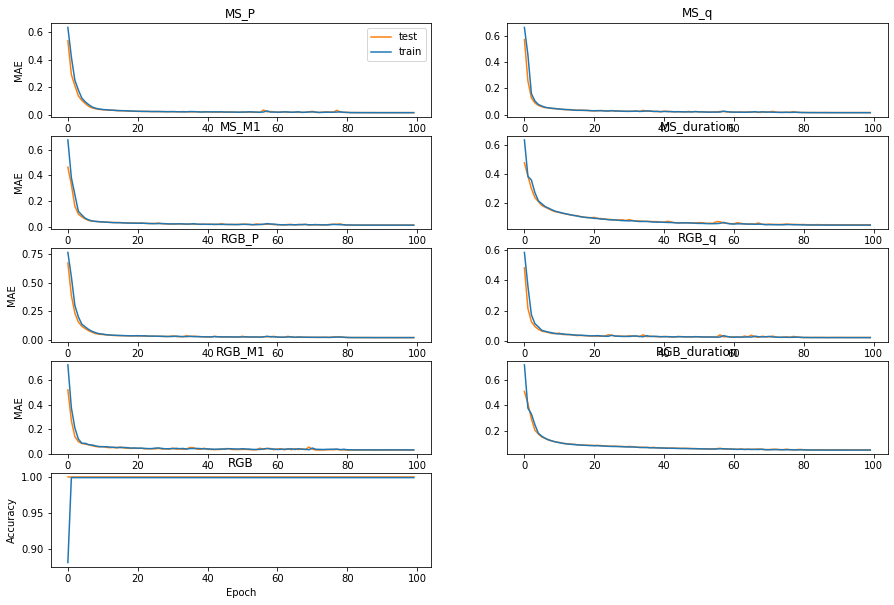

In [20]:
pl.figure(figsize=(15,10))
predictor_pre_interaction.print_score()
predictor_pre_interaction.plot_training_history()

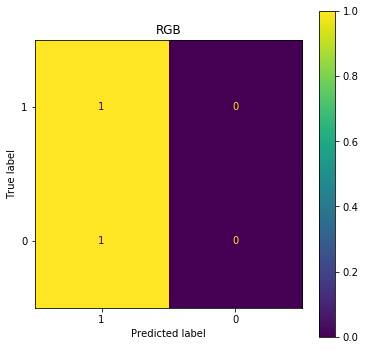

In [21]:
pl.figure(figsize=(6, 6))
predictor_pre_interaction.plot_confusion_matrix()